In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
!wget http://www.timeseriesclassification.com/Downloads/ECG5000.zip

--2023-06-08 10:12:17--  http://www.timeseriesclassification.com/Downloads/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip.1’

ECG5000.zip.1       100%[===================>]  10.12M  10.6MB/s    in 1.0s    

2023-06-08 10:12:19 (10.6 MB/s) - ‘ECG5000.zip.1’ saved [10614407/10614407]



In [ ]:

!unzip ECG5000.zip

Archive:  ECG5000.zip
replace ECG5000.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ECG5000.txt             
replace ECG5000_TEST.arff? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ECG5000_TEST.arff       
replace ECG5000_TEST.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ECG5000_TEST.txt        
replace ECG5000_TRAIN.arff? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ECG5000_TRAIN.arff      
replace ECG5000_TRAIN.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ECG5000_TRAIN.txt       
replace ECG5000_TEST.ts? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ECG5000_TEST.ts         
replace ECG5000_TRAIN.ts? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ECG5000_TRAIN.ts        


In [ ]:
!ls -alrt

total 58192
-rw-r--r-- 1 root root 10614407 Aug  9  2019 ECG5000.zip.1
-rw-r--r-- 1 root root 10614407 Aug  9  2019 ECG5000.zip
-rw-r--r-- 1 root root       38 Aug  9  2019 ECG5000.txt
-rw-r--r-- 1 root root  7086857 Aug  9  2019 ECG5000_TEST.arff
-rw-r--r-- 1 root root  1128500 Aug  9  2019 ECG5000_TRAIN.txt
-rw-r--r-- 1 root root   790229 Aug  9  2019 ECG5000_TRAIN.arff
-rw-r--r-- 1 root root 10156500 Aug  9  2019 ECG5000_TEST.txt
-rw-r--r-- 1 root root  7083409 Aug  9  2019 ECG5000_TEST.ts
-rw-r--r-- 1 root root   786781 Aug  9  2019 ECG5000_TRAIN.ts
drwxr-xr-x 4 root root     4096 Jun  6 13:36 .config
drwxr-xr-x 1 root root     4096 Jun  6 13:37 sample_data
drwxr-xr-x 1 root root     4096 Jun  8 09:44 ..
-rw-r--r-- 1 root root 11285000 Jun  8 09:51 ECG_Final.txt
drwxr-xr-x 1 root root     4096 Jun  8 10:12 .


In [ ]:
!cat ECG5000_TRAIN.txt ECG5000_TEST.txt > ECG_Final.txt

In [ ]:
!head ECG_Final.txt

   1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1.0312371e-01   2.2522849e-01   1.2868305e-01   3.0248315e-01   2.5727621e-01   1.9635161e-01   1.7938297e-01   2.4472863e-01   3.4121687e-01   3.282

In [ ]:
df=pd.read_csv('ECG_Final.txt',sep='  ',header= None)

<ipython-input-53-563e86742937>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('ECG_Final.txt',sep='  ',header= None)


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [ ]:
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [ ]:
df=df.add_prefix('c')

In [ ]:
df.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

In [ ]:
df['c0'].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: c0, dtype: int64

In [ ]:
df.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.527400,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,...,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,0.760372,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,...,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,...,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,1.000000,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,...,-0.655753,-1.089300,-1.588885,-2.147449,-2.731550,-3.030509,-2.868331,-2.153513,-1.657771,-1.596692
50%,1.000000,-0.297541,-1.661892,-2.585677,-3.387934,-3.468718,-2.947061,-2.285578,-1.750157,-1.422570,...,0.473642,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.565588
75%,2.000000,0.500061,-0.677290,-1.513964,-2.235369,-2.530967,-2.398813,-1.823494,-1.484923,-1.063708,...,1.062134,1.169420,1.238687,1.264471,1.234433,1.034584,0.945237,0.951681,1.002692,0.272012
max,5.000000,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,...,2.960969,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103


In [ ]:
# a=pd.DataFrame(df.values[:,0:1])

In [ ]:
train_data,test_data,train_labels,test_labels=train_test_split(df.values,df.values[:,0:1],test_size=0.2,random_state=111)

In [ ]:
scalar=MinMaxScaler()
data_scaled = scalar.fit(train_data)
# x_train

In [ ]:
 train_data_scaled= data_scaled.transform(train_data)
 test_data_scaled=data_scaled.transform(test_data)
 # y_train

In [ ]:
train_data_scaled
# scalar=MinMaxScaler()
# X_scaled=scalar.fit_transform(x_train)
# X_test_scaled=scalar.fit_transform(x_test)


array([[0.        , 0.50002524, 0.42299659, ..., 0.61680162, 0.58388556,
        0.3649298 ],
       [0.        , 0.48602565, 0.31200637, ..., 0.60438613, 0.6676527 ,
        0.40538671],
       [0.        , 0.6760041 , 0.6161329 , ..., 0.73484988, 0.64562905,
        0.43438114],
       ...,
       [0.25      , 0.70698484, 0.7982501 , ..., 0.23053824, 0.31421167,
        0.37774737],
       [0.        , 0.46498254, 0.25827775, ..., 0.6340938 , 0.66453824,
        0.47717869],
       [0.25      , 0.69314707, 0.79831145, ..., 0.68561341, 0.61110713,
        0.53512758]])

In [ ]:
# X_test_scaled

In [ ]:
# X_scaled

In [ ]:
normal_train_data=pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_train_data=pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [ ]:
normal_test_data=pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_test_data=pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]
# Norm_data_test=pd.DataFrame(X_test_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
# Anom_data_test=pd.DataFrame(X_test_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [ ]:
print(normal_train_data.shape)
print(normal_test_data.shape)

(2356, 140)
(563, 140)


In [ ]:
print(anomaly_train_data.shape)
print(anomaly_test_data.shape)
# print(Anom_data.shape)
# print(Anom_data_test.shape)

(1644, 140)
(437, 140)


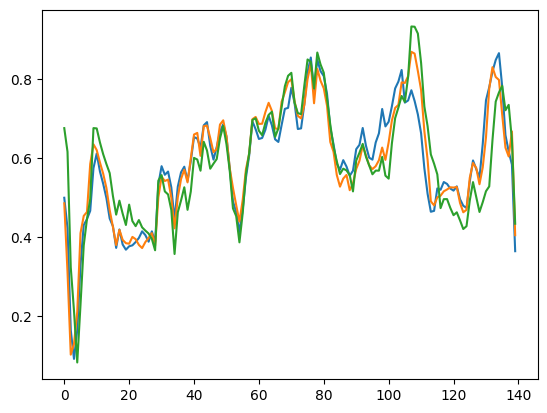

In [ ]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

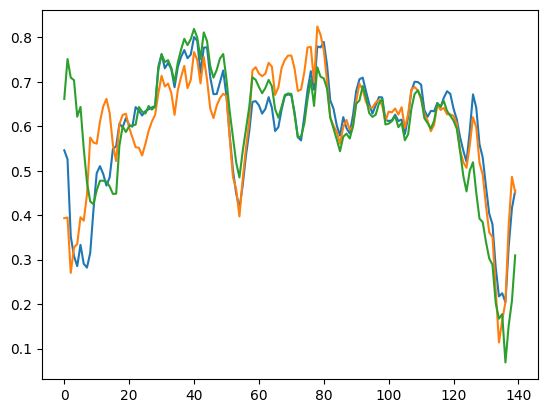

In [ ]:
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[2])

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense
model=Sequential()
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(140,activation='sigmoid'))


In [ ]:
class Autoencoder(Model):
  def __init__(self):
    super(Autoencoder,self).__init__()
    self.encoder=Sequential([
        # Dense(140,activation='relu'),
        Dense(64,activation='relu'),
        Dense(32,activation='relu'),
        Dense(16,activation='relu'),
        Dense(8,activation='relu')
    ])
    self.decoder=Sequential([
        Dense(16,activation='relu'),
        Dense(32,activation='relu'),
        Dense(64,activation='relu'),
        Dense(140,activation='sigmoid')
    ])
  def call(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded

In [ ]:
model=Autoencoder()
early_stoppings=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')
model.compile(optimizer='adam',loss='mae')

In [ ]:
history=model.fit(normal_train_data,normal_train_data,epochs=50,batch_size=128,shuffle=True,validation_data=(train_data_scaled[:,1:],train_data_scaled[:,1:]),callbacks=[early_stoppings])

Epoch 1/50
19/19 [==============================] - 2s 22ms/step - loss: 0.1325 - val_loss: 0.1188
Epoch 2/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0859 - val_loss: 0.0853
Epoch 3/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0551 - val_loss: 0.0780
Epoch 4/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0491 - val_loss: 0.0764
Epoch 5/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0480 - val_loss: 0.0761
Epoch 6/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0478 - val_loss: 0.0754
Epoch 7/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0474 - val_loss: 0.0746
Epoch 8/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0468 - val_loss: 0.0730
Epoch 9/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0453 - val_loss: 0.0704
Epoch 10/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0418 - val_loss: 0.0657
Epoch 11/50
19/1

In [ ]:
encoder_out=model.encoder(normal_test_data).numpy()
decoder_out=model.decoder(encoder_out).numpy()

In [ ]:
print(encoder_out.shape)
print(decoder_out.shape)

(563, 8)
(563, 140)


In [ ]:
encoder_out_a=model.encoder(anomaly_test_data).numpy()
decoder_out_a=model.decoder(encoder_out_a).numpy()

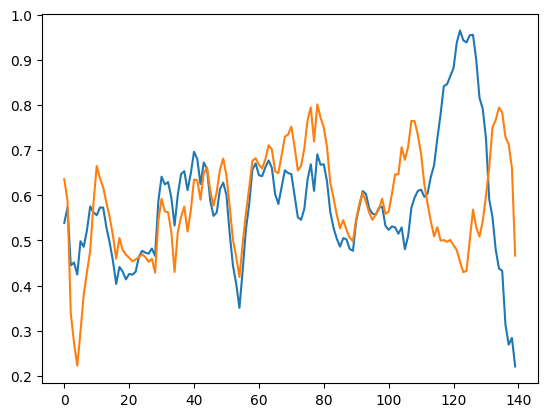

In [ ]:
plt.plot(anomaly_test_data[15])
plt.plot(decoder_out_a[15])

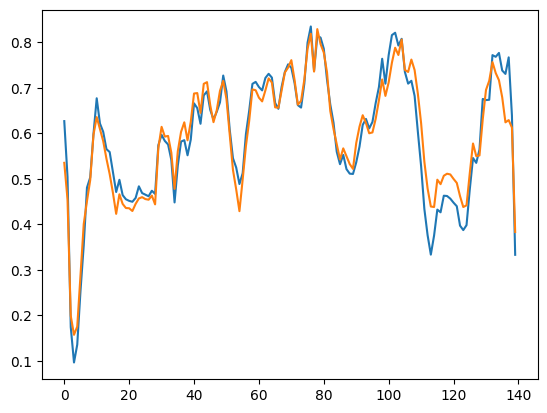

In [ ]:
plt.plot(normal_test_data[5])
plt.plot(decoder_out[5])

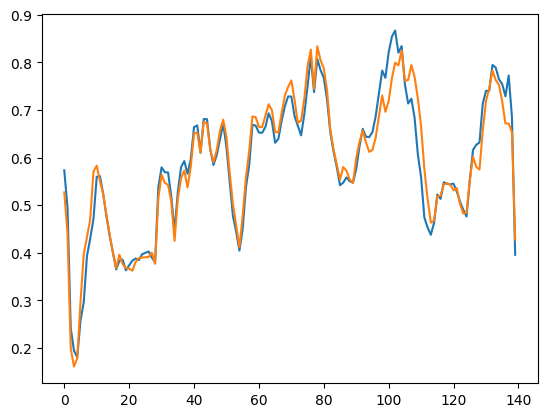

In [ ]:
plt.plot(normal_test_data[3])
plt.plot(decoder_out[3])

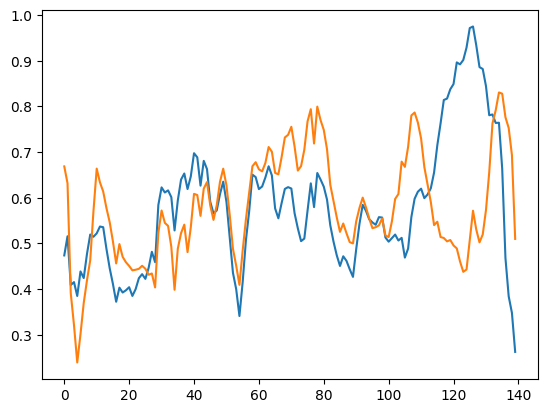

In [ ]:
plt.plot(anomaly_test_data[25])
plt.plot(decoder_out_a[25])